In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create a DataFrame
data = {'column1': [1, 2, 3, 4, 5],
        'column2': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation_matrix = df.corr()
correlation_coefficient = correlation_matrix.loc['column1', 'column2']

print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: -1.0


In [4]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Calculate the correlation coefficient
correlation_matrix = df.corr()
# correlation_coefficient = correlation_matrix.loc['column1', 'column2']

# print("Correlation Coefficient:", correlation_coefficient)
correlation_matrix 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


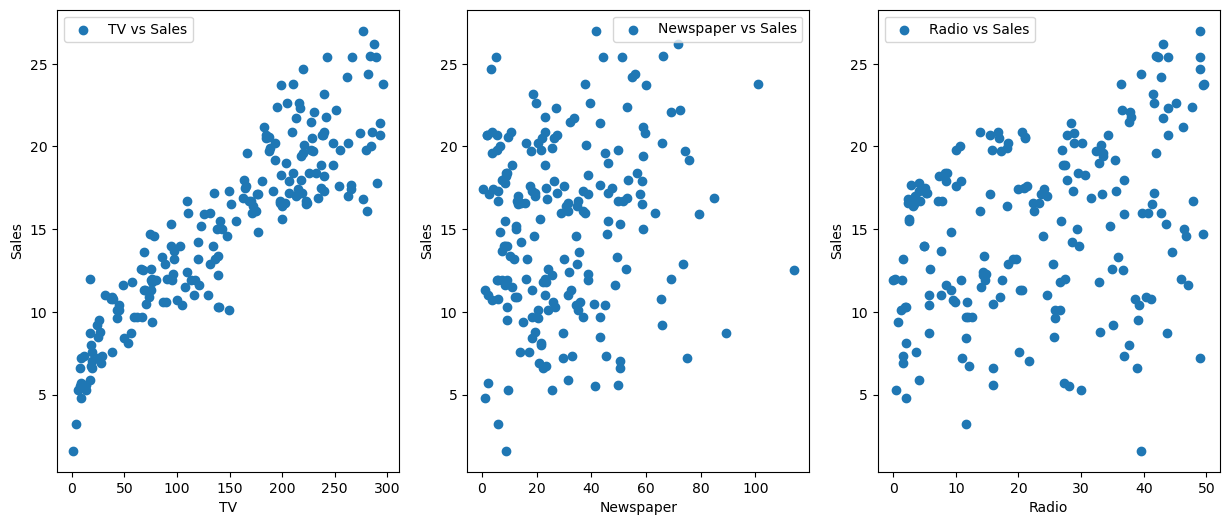

In [9]:
plt.figure(figsize=(15,6))
# fig= plt.figure(figsize=(6, 3))  # 6 inches wide, 3 inches tall

# Create the first subplot (1 row, 2 columns, first plot)
ax1 = plt.subplot(1, 3,1)#(rows,columns,placing)#return axis and figure
ax1.scatter(df['TV'], df['Sales'], label="TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
# Create the second subplot (1 row, 2 columns, second plot)
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(df['Newspaper'], df['Sales'], label="Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.legend()
ax3=plt.subplot(1,3,3)
ax3.scatter(df['Radio'], df['Sales'], label="Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
# Display the plot
plt.legend()

plt.show()

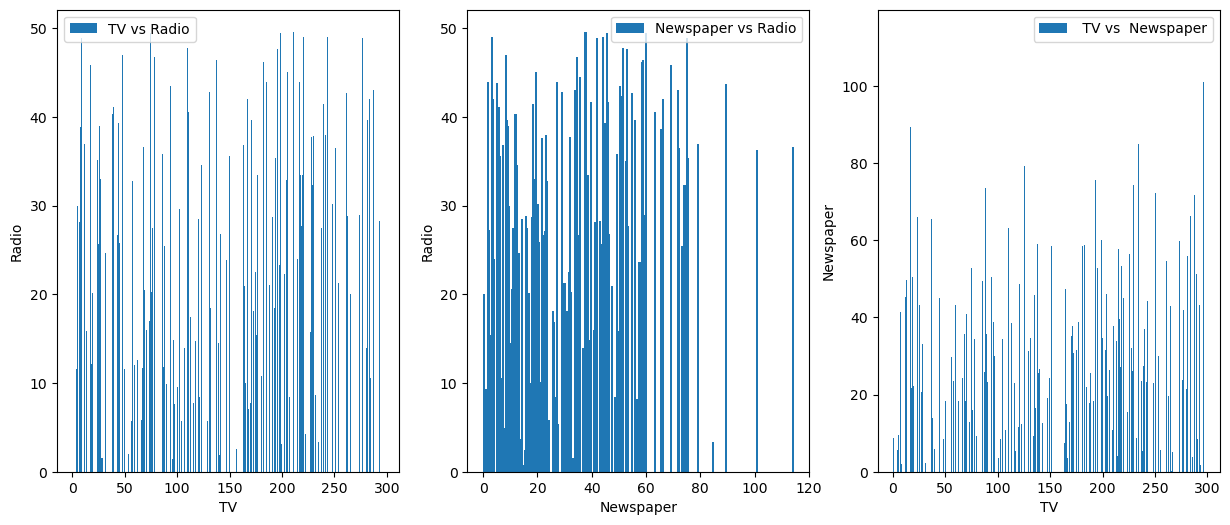

In [10]:
# check independancy of the features
plt.figure(figsize=(15,6))
# fig= plt.figure(figsize=(6, 3))  # 6 inches wide, 3 inches tall

# Create the first subplot (1 row, 2 columns, first plot)
ax1 = plt.subplot(1, 3,1)#(rows,columns,placing)#return axis and figure
ax1.bar(df['TV'], df['Radio'], label="TV vs Radio")
plt.xlabel("TV")
plt.ylabel("Radio")
plt.legend()
# Create the second subplot (1 row, 2 columns, second plot)
ax2 = plt.subplot(1, 3, 2)
ax2.bar(df['Newspaper'], df['Radio'], label="Newspaper vs Radio")
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.legend()
ax3=plt.subplot(1,3,3)
ax3.bar( df['TV'],df['Newspaper'], label=" TV vs  Newspaper")
plt.ylabel("Newspaper")
plt.xlabel("TV")
# Display the plot
plt.legend()

plt.show()

In [11]:
# from sklearn.linear_model import LinearRegression #here import only linearRegression
from sklearn import linear_model
# linear_model.LinearRegression()
reg = linear_model.LinearRegression()
# Fit the linear regression model
reg.fit(df[['TV']], df['Sales'])
# Access the slope (m) and intercept (c) of the line
m = reg.coef_[0]
c = reg.intercept_

print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 0.055464770469558874
Intercept (c): 6.974821488229891


In [12]:
predicted_value = reg.predict([[17.2]])

print("Predicted value:", predicted_value)


Predicted value: [7.92881554]


C:\Users\Shyam Singh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
reg = linear_model.LinearRegression()

X=df[['TV']]
Y=df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)

#model evaluation
accuracy_score=reg.score(X_test, Y_test)
accuracy_score

0.8175681424537488

In [14]:
Y_test

58     23.8
197    14.8
88     12.9
124    19.7
196    14.0
135    11.6
128    24.7
176    20.2
140    10.9
24      9.7
144    12.3
9      15.6
147    25.4
99     17.2
103    19.7
85     20.2
169    20.0
74     17.0
154    20.6
6      11.8
51     10.7
26     15.0
56      5.5
36     25.4
182     8.7
132     5.7
59     18.4
70     18.3
19     14.6
16     12.5
46     10.6
136     9.5
137    20.8
165    16.9
57     13.2
78      5.3
175    27.0
13     13.7
142    20.1
34     11.9
Name: Sales, dtype: float64

In [15]:
X_test

,TV
58,210.8
197,177.0
88,88.3
124,229.5
196,94.2
135,48.3
128,220.3
176,248.4
140,73.4
24,62.3


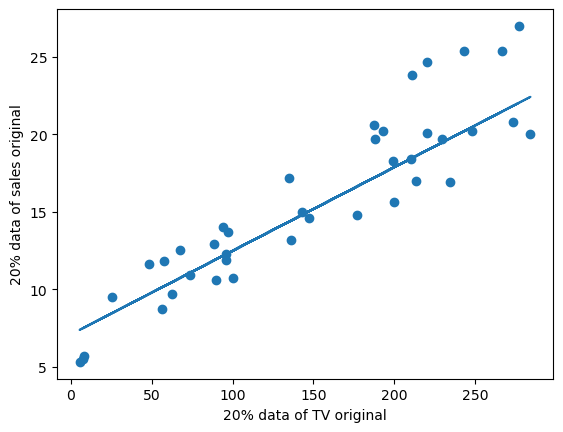

In [16]:
#these graphs shows the relationship between the original sales of tv and predictions sales of tv by model
fig=plt.figure()
plt.scatter(X_test, Y_test)
plt.xlabel("20% data of TV original")
plt.ylabel("20% data of sales original")
plt.plot(X_test, predictions)
plt.show()

In [17]:
df2=pd.DataFrame(Y_test)
df2['Predict']=predictions
df2['Error']=abs(df2['Sales'] - df2['Predict'])
df2['Error%']=(df2['Error']/df2['Sales'])*100
df2

,Sales,Predict,Error,Error%
58,23.8,18.453000,5.347000,22.466388
197,14.8,16.628833,1.828833,12.356980
88,12.9,11.841745,1.058255,8.203529
124,19.7,19.462228,0.237772,1.206964
196,14.0,12.160164,1.839836,13.141683
135,11.6,9.682968,1.917032,16.526141
128,24.7,18.965709,5.734291,23.215752
176,20.2,20.482250,0.282250,1.397278
140,10.9,11.037600,0.137600,1.262388
24,9.7,10.438540,0.738540,7.613810


In [18]:
d = df2['Error%'].mean()
d =(100-d) 
d

87.38445259306395

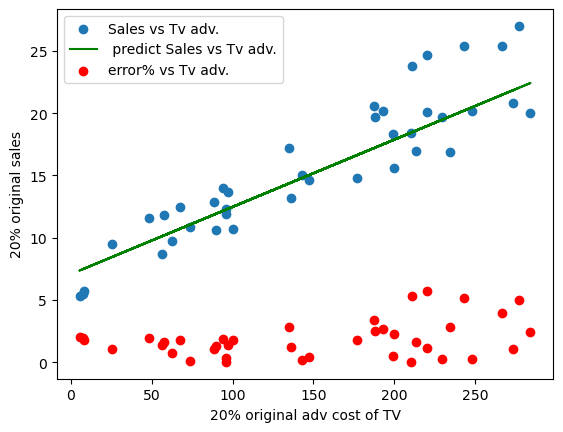

In [24]:
fig=plt.figure()
plt.scatter(X_test, df2['Sales'], label="Sales vs Tv adv.")
plt.xlabel("20% original adv cost of TV")
plt.ylabel("20% original sales")
plt.plot(X_test,df2['Predict'], color='g',label=" predict Sales vs Tv adv.")
plt.scatter(X_test, df2['Error'], color='r',label="error% vs Tv adv.")
plt.legend()
plt.show()

This above figure shows:
1. The variations of the actual values of Sales of TV with  TV advertising cost (taking only 20% test data)
2. It also shows relationship b/w the predicting values of Sales with TV Advertising cost.
3. It also shows the relationship b/w error% and Tv advertising cost.